In [1]:
import pandas as pd
import numpy as np
from dfply import *
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from pylab import *

In [2]:
data = pd.read_csv("E://EXC/hr_train.csv")
test = pd.read_csv("E://EXC/hr_test.csv")
data.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [3]:
def missing_count(dataset):
    for i in dataset.columns:
        temp = sum(dataset[i].isna())
        print(i+" = "+str(temp))        

In [4]:
missing_count(data)

employee_id = 0
department = 0
region = 0
education = 2409
gender = 0
recruitment_channel = 0
no_of_trainings = 0
age = 0
previous_year_rating = 4124
length_of_service = 0
KPIs_met >80% = 0
awards_won? = 0
avg_training_score = 0
is_promoted = 0


In [5]:
missing_count(test)

employee_id = 0
department = 0
region = 0
education = 1034
gender = 0
recruitment_channel = 0
no_of_trainings = 0
age = 0
previous_year_rating = 1812
length_of_service = 0
KPIs_met >80% = 0
awards_won? = 0
avg_training_score = 0


In [6]:
# Impute missing values
def impute_missing_values(dataset):
    na_index = np.where(dataset.education.isna())
    for i in na_index:
        dataset.education[i]='Below Secondary'

    na_index = np.where(dataset.previous_year_rating.isna())
    for i in na_index:
        dataset.previous_year_rating[i]=0  
        
    return dataset
        
data = impute_missing_values(data)      
test = impute_missing_values(test)  

D:\anaconda_install\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\anaconda_install\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Exploratory Data Analysis
- Univariate Analyis

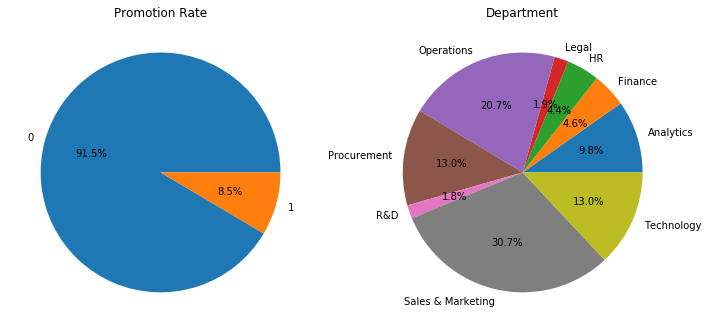

In [7]:
plt.subplots(figsize=(10,10))

subplot(1,2,1)
a=data.groupby('is_promoted').size()
plt.pie(a,labels=unique(data.is_promoted),autopct='%1.1f%%')
plt.title("Promotion Rate")


subplot(1,2,2)
a=data.groupby('department').size()
plt.pie(a,labels=unique(data.department),autopct='%1.1f%%')
plt.title("Department")

plt.tight_layout()

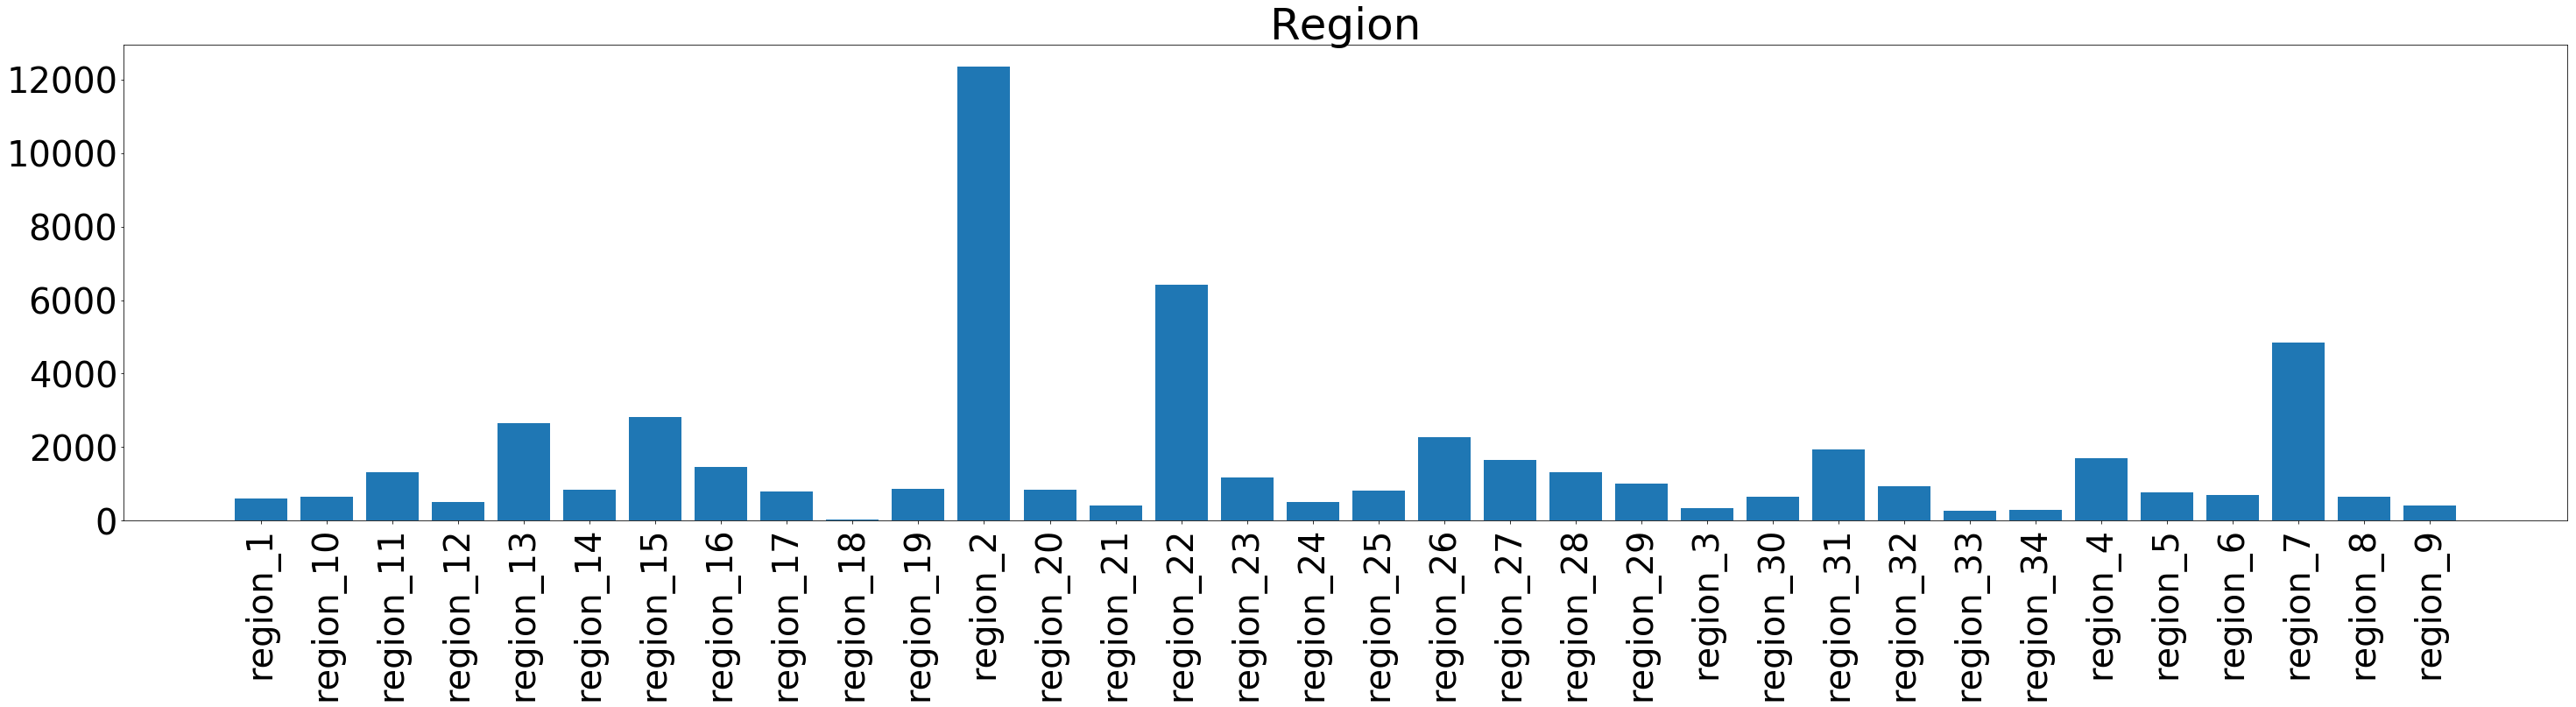

In [8]:
a=data.groupby('region').size()
plt.figure(figsize=(50,10))
plt.bar(unique(data.region),a)
plt.title("Region",fontsize='50')
plt.xticks(rotation='vertical', fontsize='40')
plt.yticks(fontsize='40')
plt.show()

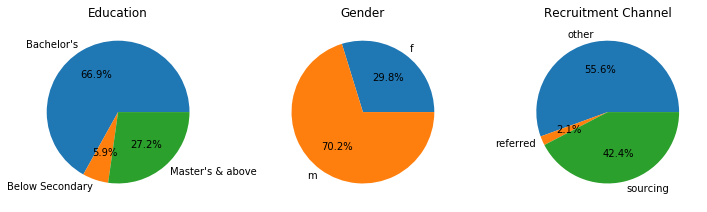

In [9]:
plt.subplots(figsize=(10,10))

subplot(1,3,1)
a=data.groupby('education').size()
plt.pie(a,labels=unique(data.education),autopct='%1.1f%%')
plt.title("Education")

subplot(1,3,2)
a=data.groupby('gender').size()
plt.pie(a,labels=unique(data.gender),autopct='%1.1f%%')
plt.title("Gender")

subplot(1,3,3)
a=data.groupby('recruitment_channel').size()
plt.pie(a,labels=unique(data.recruitment_channel),autopct='%1.1f%%')
plt.title("Recruitment Channel")

plt.tight_layout()

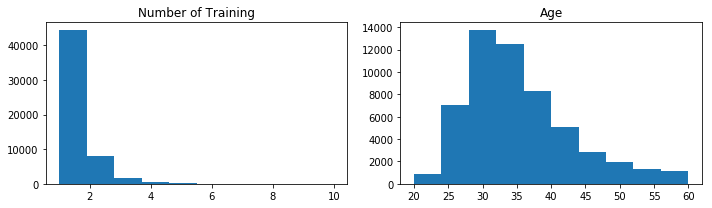

In [10]:
plt.subplots(figsize=(10,3))

subplot(1,2,1)
plt.hist(data.no_of_trainings)
plt.title("Number of Training")

subplot(1,2,2)
plt.hist(data.age)
plt.title("Age")

plt.tight_layout()

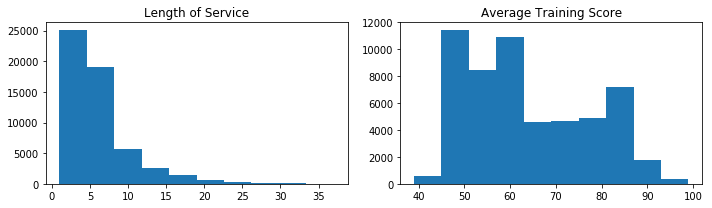

In [11]:
plt.subplots(figsize=(10,3))

subplot(1,2,1)
plt.hist(data.length_of_service)
plt.title("Length of Service")

subplot(1,2,2)
plt.hist(data.avg_training_score)
plt.title("Average Training Score")

plt.tight_layout()

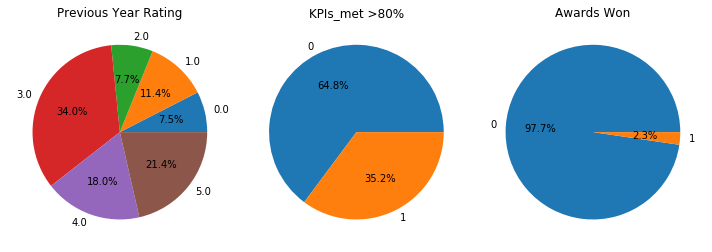

In [12]:
plt.subplots(figsize=(10,10))

subplot(1,3,1)
a=data.groupby('previous_year_rating').size()
plt.pie(a,labels=unique(data.previous_year_rating),autopct='%1.1f%%')
plt.title("Previous Year Rating")


subplot(1,3,2)
a=data.groupby('KPIs_met >80%').size()
plt.pie(a,labels=unique(data['KPIs_met >80%']),autopct='%1.1f%%')
plt.title("KPIs_met >80%")

subplot(1,3,3)
a=data.groupby('awards_won?').size()
plt.pie(a,labels=unique(data['awards_won?']),autopct='%1.1f%%')
plt.title("Awards Won")

plt.tight_layout()

- Bivariate Analyis 

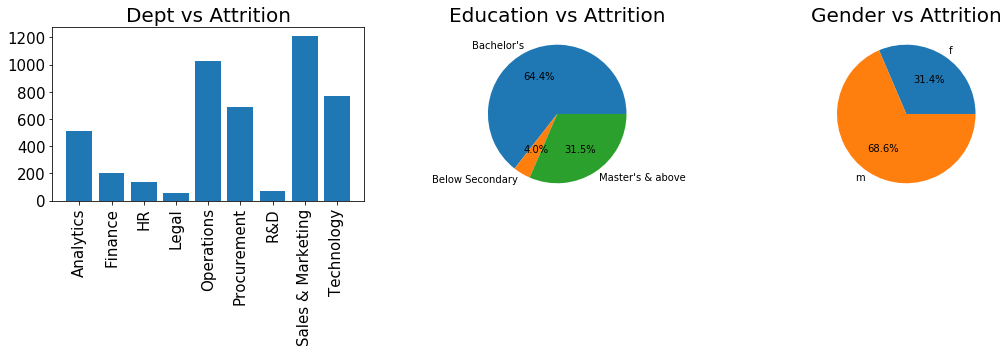

In [13]:
plt.subplots(figsize=(15,5))

subplot(1,3,1)
a=data.groupby('department').sum()['is_promoted']
plt.bar(unique(data.department),a)
plt.xticks(rotation='vertical',fontsize='15')
plt.yticks(fontsize='15')
plt.title("Dept vs Attrition",fontsize='20')

subplot(1,3,2)
a=data.groupby('education').sum()['is_promoted']
plt.pie(a,labels=unique(data.education),autopct='%1.1f%%')
plt.xticks(rotation='vertical',fontsize='15')
plt.yticks(fontsize='15')
plt.title("Education vs Attrition",fontsize='20')

subplot(1,3,3)
a=data.groupby('gender').sum()['is_promoted']
plt.pie(a,labels=unique(data.gender),autopct='%1.1f%%')
plt.xticks(fontsize='25')
plt.yticks(fontsize='15')
plt.title("Gender vs Attrition",fontsize='20')

plt.tight_layout()

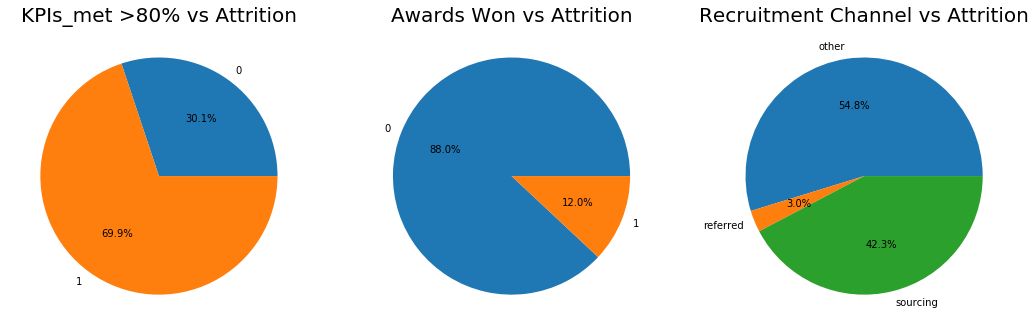

In [14]:
plt.subplots(figsize=(15,5))

subplot(1,3,1)
a=data.groupby('KPIs_met >80%').sum()['is_promoted']
plt.pie(a,labels=unique(data['KPIs_met >80%']),autopct='%1.1f%%')
plt.xticks(rotation='vertical',fontsize='15')
plt.yticks(fontsize='15')
plt.title("KPIs_met >80% vs Attrition",fontsize='20')

subplot(1,3,2)
a=data.groupby('awards_won?').sum()['is_promoted']
plt.pie(a,labels=unique(data['awards_won?']),autopct='%1.1f%%')
plt.xticks(rotation='vertical',fontsize='15')
plt.yticks(fontsize='15')
plt.title("Awards Won vs Attrition",fontsize='20')

subplot(1,3,3)
a=data.groupby('recruitment_channel').sum()['is_promoted']
plt.pie(a,labels=unique(data.recruitment_channel),autopct='%1.1f%%')
plt.xticks(rotation='vertical',fontsize='15')
plt.yticks(fontsize='15')
plt.title("Recruitment Channel vs Attrition",fontsize='20')

plt.tight_layout()

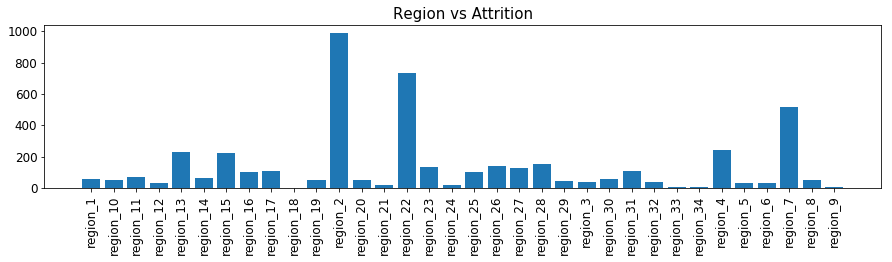

In [15]:
plt.subplots(figsize=(15,3))
a=data.groupby('region').sum()['is_promoted']
plt.bar(unique(data.region),a)
plt.xticks(rotation='vertical',fontsize='12')
plt.yticks(fontsize='12')
plt.title("Region vs Attrition",fontsize='15')
plt.show()

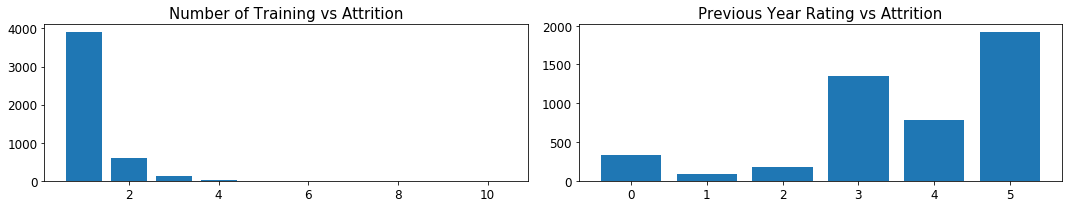

In [16]:
plt.subplots(figsize=(15,3))

subplot(1,2,1)
a=data.groupby('no_of_trainings').sum()['is_promoted']
plt.bar(unique(data.no_of_trainings),a)
plt.xticks(fontsize='12')
plt.yticks(fontsize='12')
plt.title("Number of Training vs Attrition",fontsize='15')

subplot(1,2,2)
a=data.groupby('previous_year_rating').sum()['is_promoted']
plt.bar(unique(data.previous_year_rating),a)
plt.xticks(fontsize='12')
plt.yticks(fontsize='12')
plt.title("Previous Year Rating vs Attrition",fontsize='15')

plt.tight_layout()

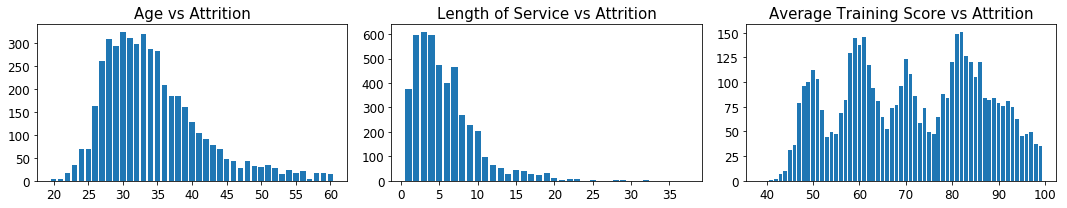

In [17]:
#'age',,#length_of_service',  'avg_training_score',       
plt.subplots(figsize=(15,3))

subplot(1,3,1)
a=data.groupby('age').sum()['is_promoted']
plt.bar(unique(data.age),a)
plt.xticks(fontsize='12')
plt.yticks(fontsize='12')
plt.title("Age vs Attrition",fontsize='15')

subplot(1,3,2)
a=data.groupby('length_of_service').sum()['is_promoted']
plt.bar(unique(data.length_of_service),a)
plt.xticks(fontsize='12')
plt.yticks(fontsize='12')
plt.title("Length of Service vs Attrition",fontsize='15')

subplot(1,3,3)
a=data.groupby('avg_training_score').sum()['is_promoted']
plt.bar(unique(data.avg_training_score),a)
plt.xticks(fontsize='12')
plt.yticks(fontsize='12')
plt.title("Average Training Score vs Attrition",fontsize='15')

plt.tight_layout()


# Pre-Processing
- Remove Duplicate Columns
- One Hot Encoding (OHE)
- Remove OHE trap

In [18]:
# Remove Duplicate Columns
def find_duplicate_columns(X_train):
    for i in range(X_train.shape[1]):
        for j in range(X_train.shape[1]):           
            if j>i:
                col_i = X_train.columns[i]
                col_j = X_train.columns[j]
                match = X_train[col_i]==X_train[col_j]
                if match.sum()==X_train.shape[0]:
                    print("Duplicate Columns !!!\nDroping ",col_j)
                    X_train = X_train.drop(X_train[col_j])
                #else:
                    #print("Duplicate Columns not found!!!",col_i," vs ",col_j)
    print("Duplicate checking done !!!")
    return X_train
data = find_duplicate_columns(data)                

Duplicate checking done !!!


- One Hot Encoding (OHE) and OHE trap

In [19]:
data=pd.get_dummies(data)
test=pd.get_dummies(test)
print("Train dataset (after One hot encoding)",data.shape)
print("Test  dataset (after One hot encoding)",test.shape)

Train dataset (after One hot encoding) (54808, 60)
Test  dataset (after One hot encoding) (23490, 59)


In [20]:
# Remove cause of multi-collinearity - due to one hot encoding
data   = data.drop(columns=['department_R&D','region_region_18','education_Below Secondary','gender_f','recruitment_channel_referred'])
print("Modified Shape = ",data.shape)

Modified Shape =  (54808, 55)


- Over-Sampling (As Promotion Percentage Rate is very Low)

In [21]:
# Check for OverSampling
print("Percentage of Promotion = {:.2f} %".format(data.is_promoted.sum()/data.shape[0]*100))
print("Requires Over-Sampling...")
add_row = data[data.is_promoted==1]
data_copy = data.append(add_row)
data_copy = data_copy.append(add_row)
print("New percentage of Promotion = {:.2f} %".format(data_copy.is_promoted.sum()/data_copy.shape[0]*100))

Percentage of Promotion = 8.52 %
Requires Over-Sampling...
New percentage of Promotion = 21.83 %


# Model Building

In [22]:
#Split of train and test dataset is already done
y_train = data_copy.is_promoted
X_train = data_copy.drop(columns=['is_promoted','employee_id'])

#y_test = ?
X_test = test.drop(columns=['employee_id'])

print("X train dimension = ",X_train.shape)
print("y train dimension = ",y_train.shape)
print("X test  dimension = ",X_test.shape)
print("Training Set (Promotion percentage) {:.2f} %".format(y_train.sum()/y_train.shape[0]*100))

X train dimension =  (64144, 53)
y train dimension =  (64144,)
X test  dimension =  (23490, 58)
Training Set (Promotion percentage) 21.83 %


# Bagging

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


DT = DecisionTreeClassifier(max_depth=10,random_state=100)
Bag_CLS = BaggingClassifier(base_estimator=DT,n_estimators=10,bootstrap=True,bootstrap_features=False,max_features=0.75, max_samples=0.5,random_state=100)
Bag_CLS.fit(X_train,y_train)
y_pred = Bag_CLS.predict(X_train)

print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.accuracy_score(y_train,y_pred))

[[49503   637]
 [ 7902  6102]]
0.8668776502868546


In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def test_bag(n_DT,n_tree_list,n_depth_list,n_feature_list,n_sample_list):    
    for n_tree in n_tree_list:
        for n_depth in n_depth_list:            
            for n_feature in n_feature_list:
                for n_sample in n_sample_list:
                    if n_DT==1:
                        DT = DecisionTreeClassifier(max_depth=n_depth,random_state=100)
                        Bag_CLS = BaggingClassifier(base_estimator=DT,n_estimators=n_tree,bootstrap=True,bootstrap_features=False,max_features=n_feature, max_samples=n_sample,random_state=100)
                    else:
                        LGR = LogisticRegression(solver='liblinear',random_state=100)                
                        Bag_CLS = BaggingClassifier(base_estimator=LGR,n_estimators=n_tree,bootstrap=True,bootstrap_features=False,max_features=n_feature, max_samples=n_sample,random_state=100)
                    Bag_CLS.fit(X_train,y_train)
                    y_pred = Bag_CLS.predict(X_train)
                    
                    print("Config:",n_DT,n_tree,n_depth,n_feature,n_sample,"Accuracy=",metrics.accuracy_score(y_train,y_pred))                

In [25]:
test_bag(0,[10,20],[10,20],[0.5,0.75],[0.5,0.75]) # With Logistic Regression

Config: 0 10 10 0.5 0.5 Accuracy= 0.8006360688450985
Config: 0 10 10 0.5 0.75 Accuracy= 0.8006828386131205
Config: 0 10 10 0.75 0.5 Accuracy= 0.8142928411075081
Config: 0 10 10 0.75 0.75 Accuracy= 0.8149320279371415
Config: 0 10 20 0.5 0.5 Accuracy= 0.8006360688450985
Config: 0 10 20 0.5 0.75 Accuracy= 0.8006828386131205
Config: 0 10 20 0.75 0.5 Accuracy= 0.8142928411075081
Config: 0 10 20 0.75 0.75 Accuracy= 0.8149320279371415
Config: 0 20 10 0.5 0.5 Accuracy= 0.7992641556497879
Config: 0 20 10 0.5 0.75 Accuracy= 0.7991862060364181
Config: 0 20 10 0.75 0.5 Accuracy= 0.8161324519830382
Config: 0 20 10 0.75 0.75 Accuracy= 0.8159297829882763
Config: 0 20 20 0.5 0.5 Accuracy= 0.7992641556497879
Config: 0 20 20 0.5 0.75 Accuracy= 0.7991862060364181
Config: 0 20 20 0.75 0.5 Accuracy= 0.8161324519830382
Config: 0 20 20 0.75 0.75 Accuracy= 0.8159297829882763


- Note 
- Config: 1 10 10 1.0 0.5 Accuracy= 0.8663320029932652 looks good. 
    - Too many trees/sample ratio increases variance in accuracy as decision trees are senstive to data

- Config: 1 10 10 0.5 0.5 Accuracy= 0.8446152407084061 can be considered for systems with limited resource
    - Taking half the feature set and sample set

In [26]:
test_bag(1,[10,20],[10,20],[0.5,0.75],[0.5,0.75]) # With Decision Tree

Config: 1 10 10 0.5 0.5 Accuracy= 0.8446152407084061
Config: 1 10 10 0.5 0.75 Accuracy= 0.84463083063108
Config: 1 10 10 0.75 0.5 Accuracy= 0.8642585432776253
Config: 1 10 10 0.75 0.75 Accuracy= 0.8643988525816912
Config: 1 10 20 0.5 0.5 Accuracy= 0.9239367672736343
Config: 1 10 20 0.5 0.75 Accuracy= 0.9368608131703666
Config: 1 10 20 0.75 0.5 Accuracy= 0.9484753055624844
Config: 1 10 20 0.75 0.75 Accuracy= 0.9573147917186331
Config: 1 20 10 0.5 0.5 Accuracy= 0.8348247692691444
Config: 1 20 10 0.5 0.75 Accuracy= 0.8351677475679721
Config: 1 20 10 0.75 0.5 Accuracy= 0.8668308805188326
Config: 1 20 10 0.75 0.75 Accuracy= 0.8642897231229734
Config: 1 20 20 0.5 0.5 Accuracy= 0.9165627338488401
Config: 1 20 20 0.5 0.75 Accuracy= 0.9292061611374408
Config: 1 20 20 0.75 0.5 Accuracy= 0.9595909204290347
Config: 1 20 20 0.75 0.75 Accuracy= 0.9662945871788476


- Adding number of trees or depth to tree may not help (if non-linearity is less/absent) 
- More sampling improve only when adequate features are present